## ADVANCED OPTIMIZATION

#### 1. Linear Programming

In [ ]:
from ortools.linear_solver import pywraplp

def LinearProgrammingExample():
    """Linear programming sample."""
    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver("GLOP")
    if not solver:
        return

    # Create the two variables and let them take on any non-negative value.
    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")


    print("Number of variables =", solver.NumVariables())

    # Constraint 0: 50x + 24y <= 2400.
    solver.Add(50*x + 24 * y <= 2400.0)

    # Constraint 1: 30x + 33y >= 0.
    solver.Add(30* x + 33*y <= 2100.0)

    # Constraint 2: x >= 45.
    solver.Add(x >= 45.0)

    # Constraint 3: y >= 5.
    solver.Add(y >= 5.0)

    print("Number of constraints =", solver.NumConstraints())

    # Objective function: x + y-50.
    solver.Maximize(x + y-50)

    # Solve the system.
    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("Solution:")
        print(f"Objective value = {solver.Objective().Value():0.1f}")
        print(f"x = {x.solution_value():0.1f}")
        print(f"y = {y.solution_value():0.1f}")
    else:
        print("The problem does not have an optimal solution.")

    print("\nAdvanced usage:")
    print(f"Problem solved in {solver.wall_time():d} milliseconds")
    print(f"Problem solved in {solver.iterations():d} iterations")


LinearProgrammingExample()


#### 2. Golden Search Method

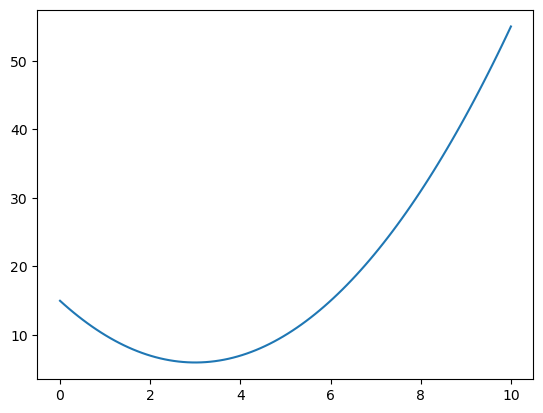

Ea = 61.80339887498949 %
Iteration 0: xL = 0	 xU = 6.18034	 x1 = 6.18034	 fx1 = 16.11456	 x2 = 3.81966	 fx2 = 6.67184	 d = 6.18034	
Ea = 61.80339887498949 %
Iteration 1: xL = 0	 xU = 3.81966	 x1 = 3.81966	 fx1 = 6.67184	 x2 = 2.36068	 fx2 = 6.40873	 d = 3.81966	
Ea = 38.19660112501051 %
Iteration 2: xL = 1.45898	 xU = 3.81966	 x1 = 2.36068	 fx1 = 6.40873	 x2 = 1.45898	 fx2 = 8.37474	 d = 2.36068	
Ea = 19.098300562505262 %
Iteration 3: xL = 2.36068	 xU = 3.81966	 x1 = 2.91796	 fx1 = 6.00673	 x2 = 2.36068	 fx2 = 6.40873	 d = 1.45898	
Ea = 11.803398874989488 %
Iteration 4: xL = 2.36068	 xU = 3.26238	 x1 = 3.26238	 fx1 = 6.06884	 x2 = 2.91796	 fx2 = 6.00673	 d = 0.9017	
Ea = 7.294901687515779 %
Iteration 5: xL = 2.7051	 xU = 3.26238	 x1 = 2.91796	 fx1 = 6.00673	 x2 = 2.7051	 fx2 = 6.08697	 d = 0.55728	
Ea = 4.314000592110801 %
Iteration 6: xL = 2.91796	 xU = 3.26238	 x1 = 3.04952	 fx1 = 6.00245	 x2 = 2.91796	 fx2 = 6.00673	 d = 0.34442	
Ea = 2.666198993411645 %
Iteration 7: xL = 2.91796	 x

In [1]:
# Golden-section search method
import math
import numpy as np
import matplotlib.pyplot as plt


def cal_f(_x):  
    return _x ** 2 - 6*_x +15


def cal_d(_xu, _xl):
    return R * (_xu - _xl)


def check_e(_xu, _xl, _xopt, _e):
    _ea = (1 - R) * abs((_xu - _xl) / _xopt)
    print("Ea = {} %".format(_ea*100))
    if _ea < _e:
        return 1
    return 0


def search(_xu, _xl, _e, _n):
    _x = [0, 0]
    _f = [0, 0]
    _result = 0
    for i in range(0, _n):
        _d = cal_d(_xu, _xl)
        _x[0] = _xl + _d
        _x[1] = _xu - _d
        _f[0] = cal_f(_x[0])
        _f[1] = cal_f(_x[1])
        if _f[0] < _f[1]:
            _xl = _x[1]
            _result = _x[0]
            if check_e(_xu, _xl, _x[0], _e):
                break
        else:
            _xu = _x[0]
            _result = _x[1]
            if check_e(_xu, _xl, _x[1], _e):
                break
        if i % 1 == 0:
            print("Iteration {}: xL = {}\t xU = {}\t x1 = {}\t fx1 = {}\t x2 = {}\t fx2 = {}\t d = {}\t"
                  .format(i, round(_xl, 5), round(_xu, 5), round(_x[0], 5), round(_f[0], 5), round(_x[1], 5),
                          round(_f[1], 5), round(_d, 5)))
    return _result

# Creating vectors X and Y
_x = np.linspace(0, 10, 100)
y = _x ** 2 - 6*_x +15
# fig = plt.figure(figsize = (10, 5))
plt.plot(_x, y)
plt.show()


R = (math.sqrt(5) - 1) * 0.5
xU = 10
xL = 0
eS = 1 / 1000
n = 100
result = search(xU, xL, eS, n)
print("Golden ration: ",R)
print("x = {}, fx = {}".format(result, cal_f(result)))

#### 3. Newtons Method

Iteration 1 x1 = 2.3181818181818183
Iteration 2 x2 = 1.9704963437083074
Iteration 3 x3 = 1.8503694869325265
Iteration 4 x4 = 1.8345162349831725
Iteration 5 x5 = 1.8342432648236864


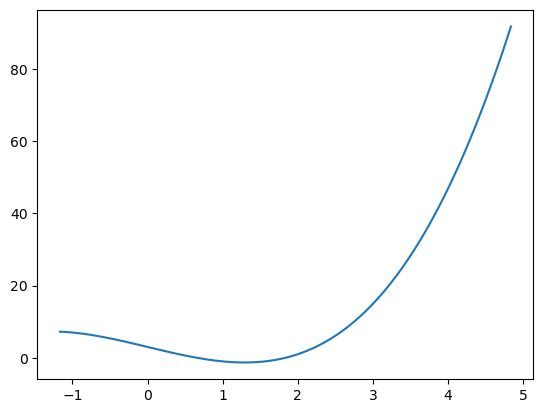

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 5*x + 3
 
def dfx(x):
    return 3*x**2 - 5
 
def newtonRaphson(x):
    return x0-(f(x0)/dfx(x0))

x0=3
iter=1

result={
    "iter1": {
        "iter": 1,
    "x_prev": x0,
    "x_next": x0,
    "error": 0.01
    }
}

while abs(f(x0))>0.00001:
    xn=newtonRaphson(x0)
    print("Iteration "+str(iter)+" x"+str(iter)+" = "+str(xn))
    error=abs(xn-x0)
    name='iter'+str(iter)
    result[name]={
        "iter": iter,
    "x_prev": x0,
    "x_next": xn,
    "error": error
    }
    x0=xn    
    iter=iter+1



x_plot = np.linspace(x0-3, xn+3, 100)
y =f(x_plot)

plt.plot(x_plot, y)
# plt.scatter(x_val, yy, marker='.', linewidths=2, color='r')
plt.show()

#### 4. Stochastic Gradient Descent

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd

x1=np.array([4,2,1,3,1,6])
x2=np.array([1,8,0,2,4,7])
y=np.array([2,-14,1,-1,7,-8])

#model function
def model(a, x1, x2, b1, b2):
   return a + b1*x1 + b2*x2

#define our loss/error function MSE
def loss(y_true, y_pred):
   """Mean squared error"""
   return np.mean((y_true - y_pred) ** 2)

def stochastic_gradient_descent(
       x1, x2, y, epochs=20, learning_rate=0.01, batch_size=3, stopping_threshold=1e-10
):
    """
    SGD with support for mini-batches.
    """
    # Initialize the model parameters randomly
    b1 = -0.044
    b2 = -0.042
    a=0
    
    n = len(x1)
    previous_loss = np.inf
    
    for i in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        x1 = x1[indices]
        x2 = x2[indices]
        y = y[indices]
        
        for j in range(0, n, batch_size):
            x1_batch = x1[j:j + batch_size]
            x2_batch = x2[j:j + batch_size]
            y_batch = y[j:j + batch_size]
            
            # Compute the gradients
            y_pred = model(a, x1_batch,x2_batch, b1,b2)
            a_gradient = -2 * np.mean(y_batch - y_pred)
            b1_gradient = -2 * np.mean(x1_batch * (y_batch - y_pred))
            b2_gradient = -2 * np.mean(x2_batch * (y_batch - y_pred))
            
            # Update the model parameters
            a -= learning_rate * a_gradient
            b1 -= learning_rate * b1_gradient
            b2 -= learning_rate * b2_gradient
        
        # Compute the loss
        y_pred = model(a, x1,x2, b1, b2)
        current_loss = loss(y, y_pred)
        
        if previous_loss - current_loss < stopping_threshold:
            break
        previous_loss = current_loss
        print(f"Iteration {i}: a = {a:.5f}, b1 = {b1:.5f} ,b2 = {b2:.5f} and error = {previous_loss:.10f}")
    
    return a, b1, b2

# Find the optimal parameters
stochastic_gradient_descent(x1, x2, y)

# # Make predictions
# y_preds = model(m, test_xy[:, 0], b)

# # Compute and print the loss
# mean_squared_error = loss(test_xy[:, 1], y_preds)

Iteration 0: a = -0.05308, b1 = -0.36468 ,b2 = -0.80923 and error = 30.4678715869
Iteration 1: a = 0.04179, b1 = -0.14822 ,b2 = -0.72192 and error = 30.0770947740


(0.02970587356272024, -0.34296247184849576, -1.2498931837736318)

#### 5. Conjugate Gradient

In [5]:
import numpy as np

def conjgrad(A, b, x_0): 
    r_0 = b - np.dot(A, x_0)
    p_0 = r_0
    
    for i in range(len(b)):
        #calculate alpha_k
        rs_k = np.dot(np.transpose(r_0), r_0)
        p=p_0
        Ap = np.dot(A, p)
        alpha = rs_k / np.dot(np.transpose(p), Ap)

        
        #calcuate x_k+1
        x_next = x_0 + np.dot(alpha, p)

        #calculate r_next
        r_prev=r_0
        r_next = r_prev - np.dot(alpha, Ap)

        #Stopping criteria
        if np.dot(np.transpose(r_next), r_next) < 1e-8:
            break

        #calculate beta_k
        rs_next = np.dot(np.transpose(r_next), r_next)
        beta_k=rs_next/rs_k

        #calcuate p_k+1
        p_next = r_next + beta_k*p
        p_0 = p_next
        r_0=r_next
        x_0=x_next
    return x_next
    
A=np.array([[4,1],[1,3]])

bb=np.array([1,2])
b=np.transpose(bb)

xx=np.array([2,1])
x=np.transpose(xx)

conjgrad(A, b, x)

array([0.09090909, 0.63636364])